# TOY TOV Solver

Radius R = 10.348337420324222
Mass M = 1.3974391938084039
Compactness M/R = 0.13503997183777766


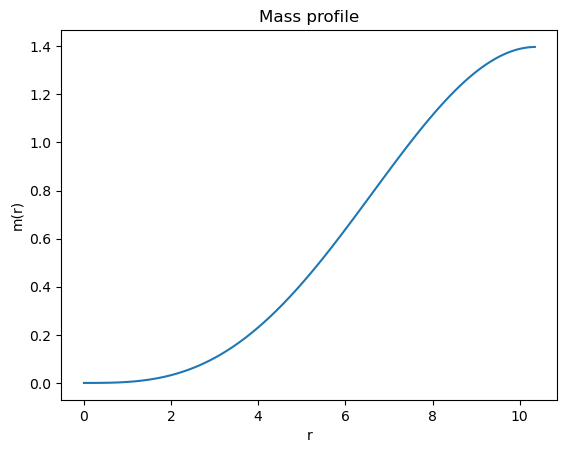

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Polytropic parameters
K = 100.0
n = 1.0
gamma = 1 + 1/n

def eos_rho(P):
    return (P / K)**(1/gamma)

def tov_equations(r, y):
    m, P = y
    
    if P <= 0:
        return [0, 0]

    rho = eos_rho(P)

    dm_dr = 4 * np.pi * r**2 * rho
    
    dP_dr = -(rho + P) * (m + 4*np.pi*r**3*P) / (r*(r - 2*m))

    return [dm_dr, dP_dr]

# Initial conditions
r0 = 1e-5
rho_c = 1e-3
P0 = K * rho_c**gamma
m0 = 4/3 * np.pi * r0**3 * rho_c

y0 = [m0, P0]

# Stop when pressure reaches zero
def stop_surface(r, y):
    return y[1]
stop_surface.terminal = True
stop_surface.direction = -1

sol = solve_ivp(
    tov_equations,
    [r0, 50],
    y0,
    events=stop_surface,
    max_step=0.1
)

r = sol.t
m = sol.y[0]
P = sol.y[1]
rho = eos_rho(P)


R = r[-1]
M = m[-1]

print("Radius R =", R)
print("Mass M =", M)
print("Compactness M/R =", M/R)

plt.plot(r, m)
plt.xlabel("r")
plt.ylabel("m(r)")
plt.title("Mass profile")
plt.show()


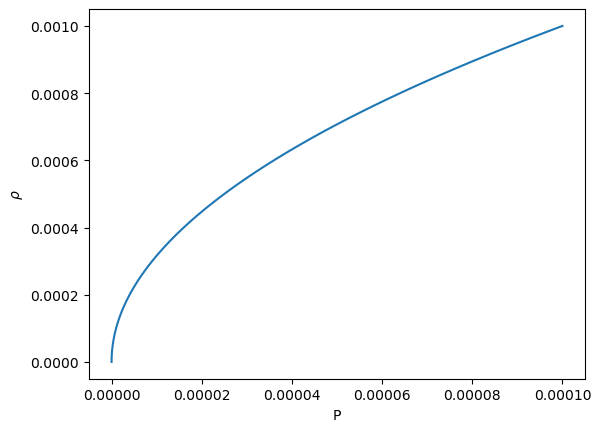

In [7]:
plt.plot(P,rho)
plt.xlabel('P')
plt.ylabel(r"$\rho$")
plt.show()

# TOV With Tidal Perturbations

In [8]:
import numpy as np
from scipy.integrate import solve_ivp

# Polytropic parameters
K = 100.0
n = 1.0
gamma = 1 + 1/n

def eos_rho(P):
    return (P / K)**(1/gamma)

def tov_tidal_equations(r, y):
    m, P, H, Z = y

    if P <= 0:
        return [0, 0, 0, 0]

    rho = eos_rho(P)

    # TOV equations
    dm_dr = 4 * np.pi * r**2 * rho

    dP_dr = -(rho + P) * (m + 4*np.pi*r**3*P) / (r*(r - 2*m))

    # Metric factor
    e_lambda = 1.0 / (1 - 2*m/r)

    # Speed of sound squared
    dP_drho = gamma * P / rho

    # Coefficients in tidal equation
    A = (2/r) + e_lambda * (2*m/r**2 + 4*np.pi*r*(P - rho))

    B = e_lambda * (
        -6/r**2 +
        4*np.pi*(5*rho + 9*P + (rho+P)/dP_drho)
    ) - (2*(m + 4*np.pi*r**3*P)/(r*(r - 2*m)))**2

    dH_dr = Z
    dZ_dr = -A*Z - B*H

    return [dm_dr, dP_dr, dH_dr, dZ_dr]

# Initial conditions
r0 = 1e-5
rho_c = 1e-3
P0 = K * rho_c**gamma
m0 = 4/3 * np.pi * r0**3 * rho_c

# Regularity condition near center
H0 = r0**2
Z0 = 2*r0

y0 = [m0, P0, H0, Z0]

# Stop when pressure reaches zero
def stop_surface(r, y):
    return y[1]
stop_surface.terminal = True
stop_surface.direction = -1

sol = solve_ivp(
    tov_tidal_equations,
    [r0, 50],
    y0,
    events=stop_surface,
    max_step=0.05
)

r = sol.t
m = sol.y[0]
P = sol.y[1]
H = sol.y[2]
Z = sol.y[3]

R = r[-1]
M = m[-1]

# Compute y(R)
yR = R * Z[-1] / H[-1]

print("Radius R =", R)
print("Mass M =", M)
print("Compactness M/R =", M/R)
print("y(R) =", yR)


Radius R = 10.383012656925768
Mass M = 1.3974391299806728
Compactness M/R = 0.1345889845418363
y(R) = 0.7047455319049968


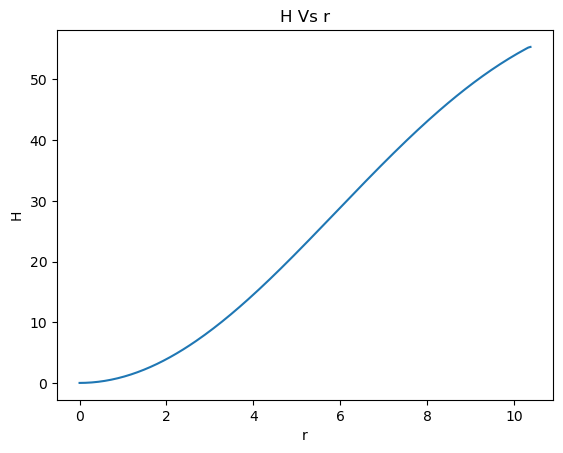

In [12]:
plt.plot(r, H)
plt.xlabel('r')
plt.ylabel('H')
plt.title('H Vs r')
plt.show()

# Calculations of $k_2$

In [14]:
C = M/R
y = yR

term1 = (1 - 2*C)**2
term2 = 2 + 2*C*(y - 1) - y

num = (8*C**5/5) * term1 * term2

den = (
    2*C*(6 - 3*y + 3*C*(5*y - 8))
    + 4*C**3*(13 - 11*y + C*(3*y - 2) + 2*C**2*(1+y))
    + 3*(1 - 2*C)**2*(2 - y + 2*C*(y - 1))*np.log(1 - 2*C)
)

k2 = num/den

print("k2 =", k2)


k2 = 0.0904321942042878
